# Dependencies

In [144]:
# dependancies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model as lin 
from sklearn import preprocessing as pre
from sklearn import metrics as met
from sklearn import model_selection as mod
from sklearn import pipeline as pip
from sklearn import datasets as dat
from sklearn import tree
from sklearn import preprocessing as pre
from sklearn import ensemble as ens
from sklearn import svm
from sklearn import decomposition as dec
from sklearn import manifold as man
from sklearn import impute as imp
from sklearn import compose as com

from imblearn import pipeline as imbPip # imblearn pipeline
from imblearn import under_sampling as und
from imblearn import over_sampling as ove

import xgboost as xgb

import seaborn as sns

np.set_printoptions(suppress=True) 

import warnings
warnings.filterwarnings("ignore")

# Functions

In [24]:
def plotLearningCurve(est, X_train, y_train, X_test, y_test, n_iter=10, minY=0,maxY=1):
    x_values = [] #number of training samples
    y_values_train = []
    y_values_test = []

    for i in np.linspace(10,len(X_train),n_iter): #increase training sizes by every iter
        i=int(i)
        #select a subset of training data
        X_train_temp = X_train[:i]
        y_train_temp = y_train[:i]
        #create the model
        est.fit(X_train_temp, y_train_temp)
        #evaluate train set
        y_pred_train=est.predict(X_train_temp)
        train_score = met.mean_squared_error(y_train_temp,y_pred_train,squared=False)
        #evaluate test set
        y_pred_test=est.predict(X_test)
        test_score = met.mean_squared_error(y_test,y_pred_test,squared=False)
        #populate lists
        y_values_train.append(train_score)
        y_values_test.append(test_score)
        x_values.append(i)
    plt.figure(figsize=(10,6))
    plt.plot(x_values,y_values_train,label="Train")
    plt.plot(x_values,y_values_test, label="Test")
    plt.legend()
    plt.ylabel("RMSE")
    plt.xlabel("# of training samples")
    plt.grid(True)
    plt.ylim(minY,maxY)
    plt.show()

In [3]:
def plotDecisionBoundaries(clf, X, y, n_classes=2):
  # Parameters
  plot_colors = "rb"
  plot_step = 0.02

  X2 = X.values
  y_now = y.values


  for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                  [1, 2], [1, 3], [2, 3]]):
      # We only take the two corresponding features
      X_now = X2[:, pair]
      
      

      # Train
      clf.fit(X_now, y_now)

      # Plot the decision boundary
      plt.subplot(2, 3, pairidx + 1)

      x_min, x_max = X_now[:, 0].min() - 1, X_now[:, 0].max() + 1
      y_min, y_max = X_now[:, 1].min() - 1, X_now[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                          np.arange(y_min, y_max, plot_step))
      plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

      

      # Plot the training points
      for i, color in zip(range(n_classes), plot_colors):
          idx = np.where(y_now == i)
          
          plt.scatter(X_now[idx, 0], X_now[idx, 1], c=color,
                      cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

  plt.suptitle("Decision surface of a decision tree using paired features")
  plt.legend(loc='lower right', borderpad=0, handletextpad=0)
  plt.axis("tight")
  plt.show()

In [4]:
def estimate_roc_curve(X_train, y_train_binary, estimators=[[tree.DecisionTreeClassifier(random_state=42),
                lin.SGDClassifier(random_state=42),
                ens.RandomForestClassifier(random_state=42)]]):
    for est in estimators:
        pipe = pip.Pipeline([
            ("scaler", pre.StandardScaler()),
            ("est",est)
        ])
        if hasattr(est,"predict_proba"):
            myMethod = "predict_proba" #returns list of lists
        else:
            myMethod = "decision_function" 

        y_scores = mod.cross_val_predict(pipe, X_train, y_train_binary,
                                        cv=5, method=myMethod)
        if myMethod == "predict_proba":
            y_scores = y_scores[:, 1] #probabilities for true class
        fpr, tpr, thresholds = met.roc_curve(y_train_binary,y_scores)
        auc_score = met.roc_auc_score(y_train_binary,y_scores)
        print(est.__class__.__name__,auc_score)
        plt.plot(fpr, tpr, label=est.__class__.__name__)
    plt.title("ROC Curve")
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.legend()
    plt.show()

In [5]:
def precision_recall_curve(est, X_train, y_train_binary):
    
    pipe = pip.Pipeline([("scaler", pre.StandardScaler())
                         ,("est",est)])
    
    if hasattr(est,"predict_proba"):
        myMethod = "predict_proba" 
    else:
        myMethod = "decision_function" 
    
    y_scores = mod.cross_val_predict(pipe,X_train,y_train_binary,cv=3, method=myMethod)
    
    precision, recall, thresholds = met.precision_recall_curve(y_train_binary, y_scores)
    
    plt.figure(figsize=(10,6))
    plt.plot(thresholds,precision[:-1], label = "precision")
    plt.plot(thresholds,recall[:-1], label = "recall")
    plt.legend()
    plt.xlabel("Thresholds")
    plt.ylabel("Precision / Recall")
    plt.show()
    
    fpr, tpr, thresholds = met.roc_curve(y_train_binary,y_scores)
    plt.plot(fpr,tpr)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.show()
    

# Main

* Binary classification
* Accuracy metric
* Imbalanced dataset 77-23 yağmıyor
* 73 altı accuracy yanlış
* ID,RainTomorrow header csv submission file ID 0-49623 7 Tane submission hakkı söz konusu
* Basit bir model kurup erken submission yapmak önemli.
* Missing data doldurursak nasıl olur doldurmazsak nasıl olur 2 farklı model

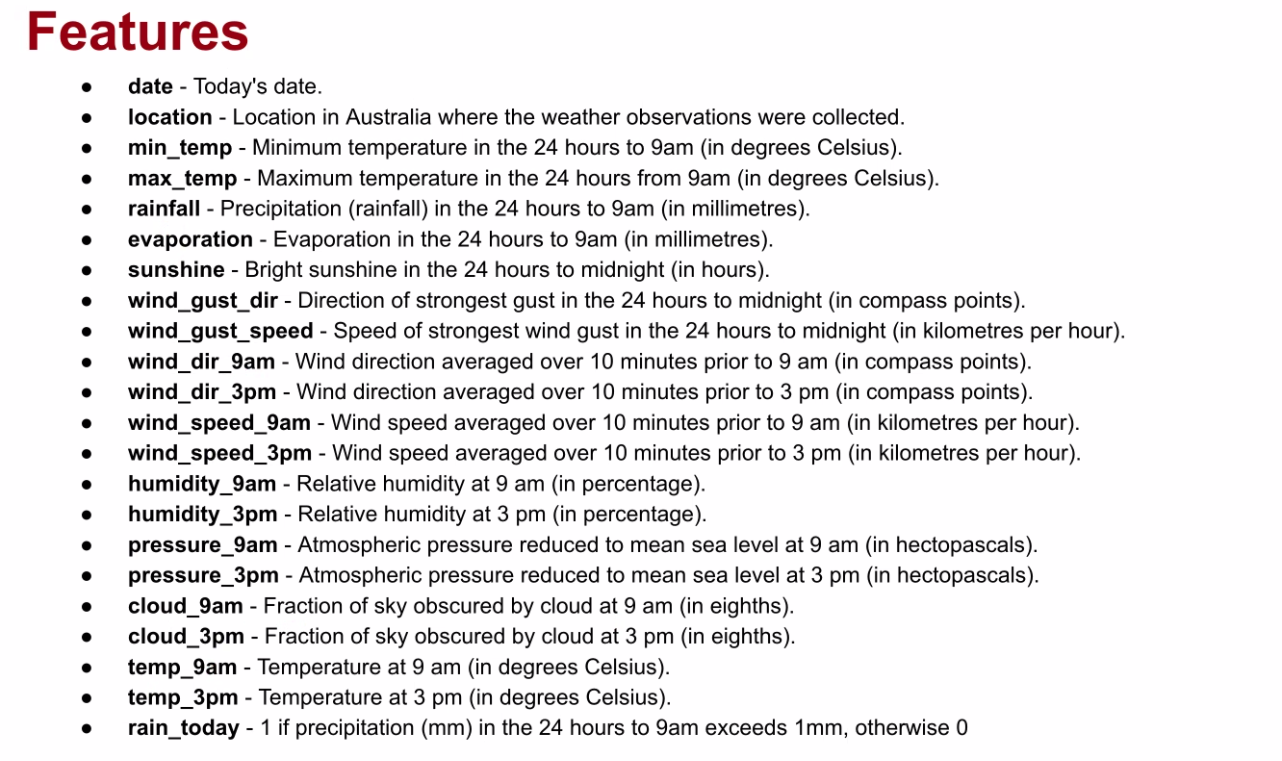

In [334]:
test_df = pd.read_csv("data/test.csv")
train_df = pd.read_csv("data/train.csv")

In [7]:
train_df.head()

,ID,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2013-08-30,Perth,13.4,20.2,5.2,1.4,5.9,WNW,50.0,...,67.0,73.0,1008.5,1006.7,4.0,6.0,18.8,18.7,Yes,1
1,1,2010-12-24,Brisbane,21.8,27.7,0.2,3.2,0.2,SSE,41.0,...,71.0,81.0,1016.9,1015.3,7.0,8.0,26.8,25.2,No,1
2,2,2008-02-13,Sydney,18.4,22.8,14.4,7.0,3.3,NaN,NaN,...,87.0,70.0,1009.2,1011.7,8.0,7.0,20.9,21.0,Yes,1
3,3,2014-10-07,Sydney,19.7,27.9,0.0,8.0,7.7,NW,61.0,...,44.0,30.0,1007.8,1008.3,7.0,1.0,24.1,25.2,No,1
4,4,2013-09-08,Bendigo,2.7,18.4,0.2,3.1,NaN,NW,20.0,...,71.0,56.0,1027.8,1024.2,NaN,1.0,12.0,17.8,No,0


In [8]:
train_df.describe()

,ID,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,95269.000000,94685.000000,94890.000000,94143.000000,54362.000000,49732.000000,88978.000000,94234.000000,93377.000000,93965.000000,92694.000000,85769.000000,85757.000000,59108.000000,56823.00000,94521.000000,93292.000000,95269.000000
mean,47634.000000,12.176457,23.220116,2.347898,5.469503,7.606817,39.955967,13.988847,18.627092,68.858703,51.495501,1017.652978,1015.262815,4.439551,4.50645,16.979216,21.680231,0.224827
std,27501.935735,6.398479,7.112616,8.465178,4.262173,3.785092,13.578222,8.895565,8.788980,19.065160,20.808018,7.105686,7.028749,2.888810,2.72190,6.487472,6.932176,0.417470
min,0.000000,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.00000,-7.200000,-5.400000,0.000000
25%,23817.000000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.00000,12.300000,16.600000,0.000000
50%,47634.000000,12.000000,22.600000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.00000,16.700000,21.100000,0.000000
75%,71451.000000,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.00000,21.600000,26.400000,0.000000
max,95268.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1041.000000,1038.500000,8.000000,9.00000,40.200000,46.700000,1.000000


In [9]:
pd.DataFrame({'Columns': train_df.isnull().sum().index, 'Missing Values': train_df.isnull().sum().values}).sort_values(by="Missing Values", ascending=False)


,Columns,Missing Values
7,Sunshine,45537
6,Evaporation,40907
19,Cloud3pm,38446
18,Cloud9am,36161
17,Pressure3pm,9512
16,Pressure9am,9500
10,WindDir9am,6833
8,WindGustDir,6336
9,WindGustSpeed,6291
11,WindDir3pm,2656


In [38]:
num_columns = list(train_df.drop(["ID","RainTomorrow"],axis=1).select_dtypes(exclude="object").columns)
cat_columns = list(train_df.select_dtypes(include="object").columns)

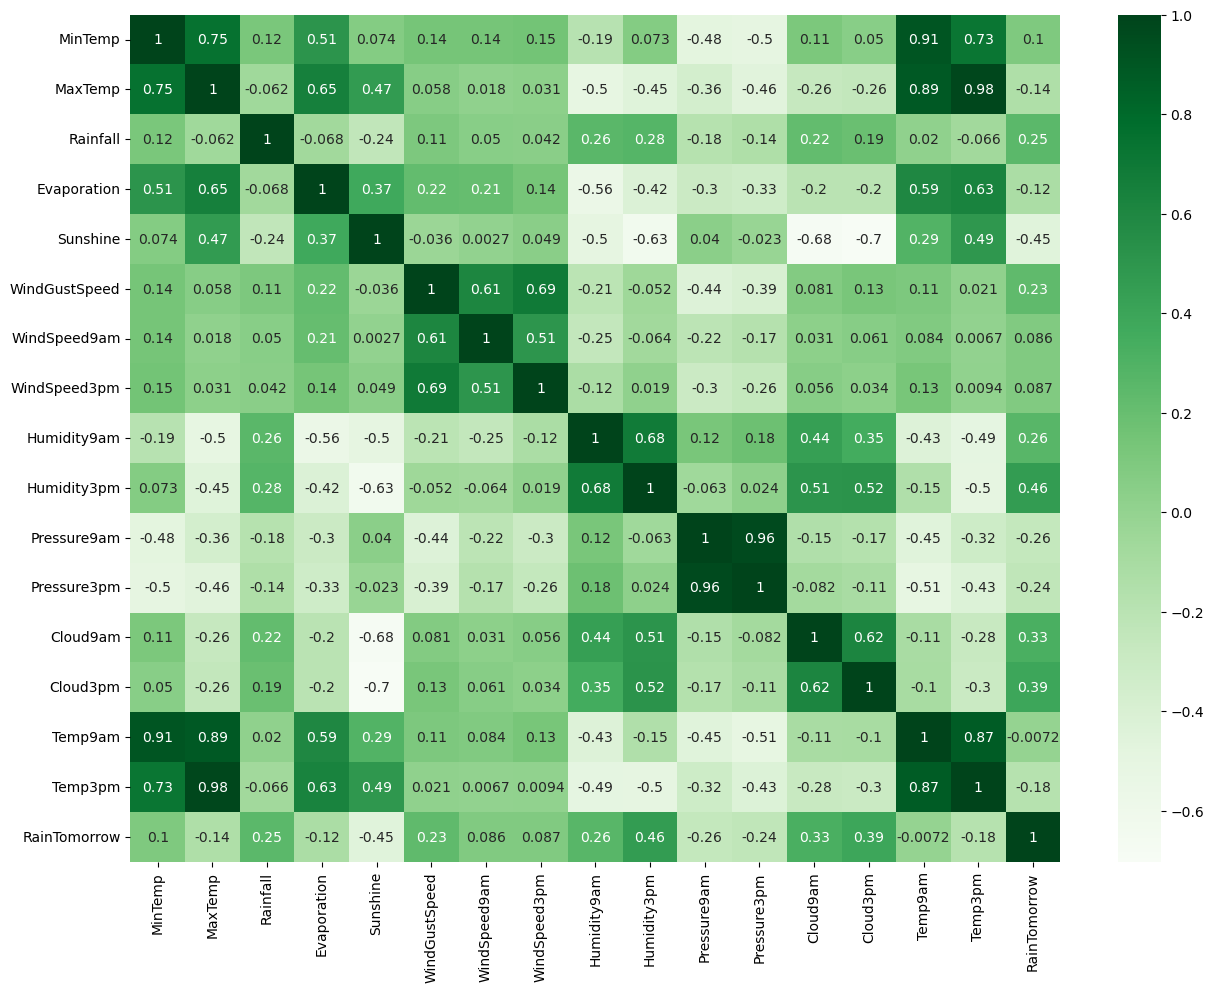

In [15]:
plt.figure(figsize=(15,11))
sns.heatmap(train_df[num_columns].dropna().drop("ID",axis=1).corr(), cmap="Greens",annot=True)
plt.show()

In [49]:
#Identify the unique values
pd.set_option('display.max_rows', None)
dict = {}

for i in list(train_df.columns):
  dict[i] = train_df[i].value_counts().shape[0]

uniq = pd.DataFrame(dict, index = ["Unique counts"]).transpose()
uniq.sort_values(by="Unique counts")

,Unique counts
RainTomorrow,2
RainToday,2
Cloud9am,9
Cloud3pm,10
WindDir9am,16
WindGustDir,16
WindDir3pm,16
WindSpeed3pm,41
WindSpeed9am,43
Location,49


## Random Forest without Categorical Data

In [65]:
X_train, X_test, y_train, y_test = mod.train_test_split(
    train_df.drop(["RainTomorrow","ID",], axis=1), train_df["RainTomorrow"], test_size=0.25, random_state=42)

In [66]:
num_columns = list(X_train.select_dtypes(exclude="object").columns)
cat_columns = list(X_train.select_dtypes(include="object").columns)

In [67]:
print(num_columns, "\n", cat_columns)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [68]:
pipeline_first = pip.Pipeline([
    ("imp", imp.SimpleImputer(strategy="mean")),
    ("tree", ens.RandomForestClassifier(max_depth=4, min_samples_split=5,random_state=42))
])


In [69]:
pipeline_first.fit(X_train[num_columns], y_train)
y_pred = pipeline_first.predict(X_test[num_columns])
met.accuracy_score(y_test, y_pred)

0.838777395247292

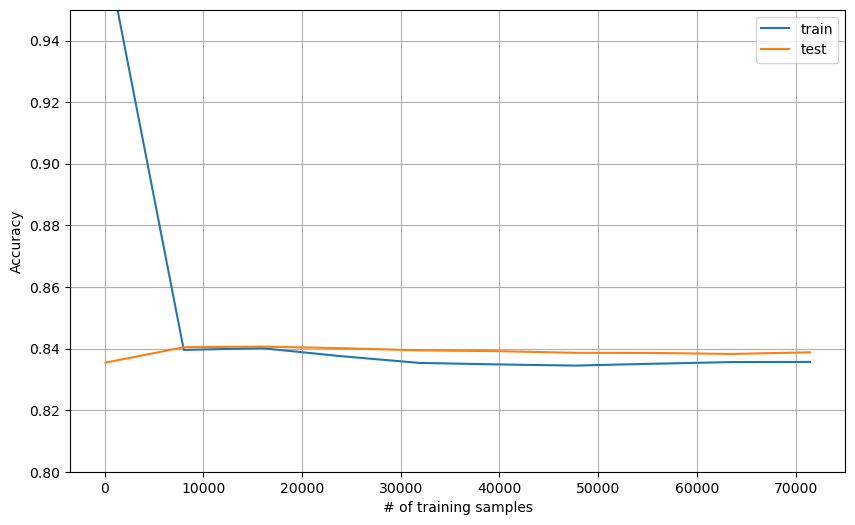

In [70]:
plotLearningCurve(pipeline_first,
                  X_train[num_columns], y_train, X_test[num_columns], y_test, 
                  n_iter=10, minY=0.80, maxY=0.95)

## Random Forest with One Hot Encoding

In [148]:
X_train, X_test, y_train, y_test = mod.train_test_split(
    train_df.drop(["RainTomorrow","ID","Date","Location"], axis=1), train_df["RainTomorrow"], test_size=0.25, random_state=42)

In [149]:
num_columns = list(X_train.select_dtypes(exclude="object").columns)
cat_columns = list(X_train.select_dtypes(include="object").columns)

In [150]:
print(num_columns, "\n", cat_columns)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 
 ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [174]:
#ct_num = com.ColumnTransformer([
#    ("num_skewed", pre.FunctionTransformer(np.log1p), num_columns)
#])

pipe_num = pip.Pipeline([
#    ("scaler", pre.StandardScaler()),
    ("imp", imp.SimpleImputer(strategy="mean"))
])

pipe_cat = pip.Pipeline([
    ("imp", imp.SimpleImputer(strategy="most_frequent")),
    ("encoding", pre.OneHotEncoder(handle_unknown="ignore", sparse=True)) 
])

ct = com.ColumnTransformer([
    ("num", pipe_num, num_columns),
    ("cat", pipe_cat, cat_columns)
])

ct.fit_transform(X_test)

<23818x3325 sparse matrix of type '<class 'numpy.float64'>'
	with 504488 stored elements in Compressed Sparse Row format>

In [175]:
pipe_RandomOneHot = pip.Pipeline([
    ("ct", ct),
    ("tree", ens.RandomForestClassifier(max_depth=4, min_samples_split=5,random_state=42))
])

In [153]:
pipe_RandomOneHot.fit(X_train, y_train)
y_pred = pipe_RandomOneHot.predict(X_test)
met.accuracy_score(y_test, y_pred)

0.8288689226635317

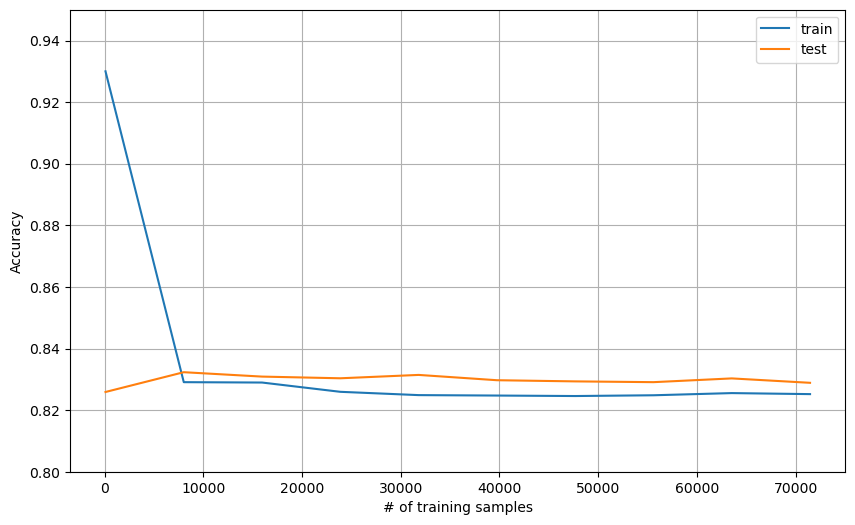

In [83]:
plotLearningCurve(pipe_RandomOneHot,
                  X_train, y_train, X_test, y_test, 
                  n_iter=10, minY=0.80, maxY=0.95)

## Using Test Data

In [229]:
test_df.columns

Index(['ID', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday'],
      dtype='object')

In [228]:
y_pred = pipeline_first.predict(test_df.select_dtypes(exclude="object").drop("ID",axis=1))

KeyError: "None of [Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',\n       'RainToday'],\n      dtype='object')] are in the [columns]"

In [122]:
type(y_pred)

numpy.ndarray

In [121]:
type(test_df["ID"])

pandas.core.series.Series

In [123]:
series_Y_pred = pd.Series(y_pred)

In [124]:
type(series_Y_pred)

pandas.core.series.Series

In [126]:
submission_Df = test_df["ID"].to_frame().join(series_Y_pred.to_frame())

In [127]:
submission_Df.head()

,ID,0
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0


In [138]:
submission_Df.rename({0: "RainTomorrow"},axis=1,inplace=True)

In [139]:
submission_Df.head()

,ID,RainTomorrow
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0


In [137]:
submission_Df.columns

Index(['ID', 0], dtype='object')

In [140]:
submission_Df.set_index("ID",inplace=True)

In [141]:
submission_Df.head()

,RainTomorrow
ID,
0,1
1,0
2,0
3,0
4,0


In [142]:
submission_Df.to_csv("submission1.csv")

## Balancing the Data

In [158]:
pipe_SMOTE  = imbPip.Pipeline([
      ("ct", ct),
      ("resample", ove.SMOTE(random_state=42)),
      ("tree", ens.RandomForestClassifier(max_depth=4, min_samples_split=5,random_state=42))
])


In [160]:
pipe_SMOTE.fit(X_train, y_train)
y_pred = pipe_SMOTE.predict(X_test)
met.accuracy_score(y_test, y_pred)

0.7845746914098581

In [167]:
pipe_SMOTE

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm']),
                                                 ('cat',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=True))]),
                                                  ['WindGustDir', 'WindDir9am',
                                                   'WindDir3pm',
                                                   'RainToday'])])),
                ('resample', SMOTE(random_state=42)),
                ('tree',
                 RandomForestClassifier(max_depth=4, min_samples_split=5,
                                        random_state=42))])

## XGB Classifier

{'XGBC__subsample': 0.8,
 'XGBC__min_child_weight': 1,
 'XGBC__max_depth': 5,
 'XGBC__gamma': 0.5,
 'XGBC__colsample_bytree': 1.0}
 {'XGBC__subsample': 0.75,
 'XGBC__min_child_weight': 1,
 'XGBC__max_depth': 5,
 'XGBC__gamma': 0.1,
 'XGBC__colsample_bytree': 1.0}
{'XGBC__subsample': 0.75,
 'XGBC__min_child_weight': 1,
 'XGBC__max_depth': 5,
 'XGBC__gamma': 0.1,
 'XGBC__colsample_bytree': 1.0}

In [213]:
# A parameter grid for XGBoost
params = {
        'XGBC__min_child_weight': [0.1, 0.5, 1],
        'XGBC__gamma': [0.01, 0.05, 0.08],
        'XGBC__subsample': [0.3, 0.5, 0.7],
        'XGBC__colsample_bytree': [0.5,1.0],
        'XGBC__max_depth': [3, 5, 10]
        }

In [232]:
X_train, X_test, y_train, y_test = mod.train_test_split(
    train_df.drop(["RainTomorrow","ID"], axis=1), train_df["RainTomorrow"], test_size=0.25, random_state=42)

In [269]:
num_columns = list(X_train.select_dtypes(exclude="object").columns)
cat_columns = list(X_train.select_dtypes(include="object").columns)

In [234]:
pipe_XGBC = pip.Pipeline([
    ("ct", ct),
    ("XGBC", xgb.XGBClassifier(objective="binary:logistic"))
])

In [235]:
pipe_XGBC.fit(X_train, y_train)
y_pred = pipe_XGBC.predict(X_test)
met.accuracy_score(y_test, y_pred)

0.8588882357880594

In [210]:
random_cv = mod.RandomizedSearchCV(pipe_XGBC, param_distributions=params,n_iter=6,
                                    scoring="accuracy",random_state=42, verbose=3)

In [ ]:
random_cv.fit(X_train,y_train)

In [238]:
y_pred2 = pipe_XGBC.predict(test_df.drop("ID",axis=1))

In [239]:
series_Y_pred2 = pd.Series(y_pred2)

In [240]:
submission_Df2 = test_df["ID"].to_frame().join(series_Y_pred2.to_frame())

In [242]:
submission_Df2.head()

,ID,0
0,0,1
1,1,0
2,2,0
3,3,0
4,4,1


In [243]:
submission_Df2.rename({0: "RainTomorrow"},axis=1,inplace=True)
submission_Df2.set_index("ID",inplace=True)
submission_Df2.head()

,RainTomorrow
ID,
0,1
1,0
2,0
3,0
4,1


In [244]:
submission_Df2.to_csv("submission2.csv")

In [217]:
random_cv.best_score_

0.8549355364127589

## Column analysis

In [247]:
locations = pd.read_excel("data/IVAA-av.xlsx")

In [248]:
locations.head()

,ŞEHİR,BÖLGE
0,Canberra,Güneydoğu
1,Sydney,Güneydoğu
2,Hobart,Güneydoğu
3,Brisbane,Doğu
4,Darwin,Kuzey


In [254]:
locations_dict = pd.Series(locations["BÖLGE"].values, index=locations["ŞEHİR"]).to_dict()

In [255]:
locations_dict

{'Canberra': 'Güneydoğu',
 'Sydney': 'Güneydoğu',
 'Hobart': 'Güneydoğu',
 'Brisbane': 'Doğu',
 'Darwin': 'Kuzey',
 'Perth': 'Güneybatı',
 'Adelaide': 'Güney',
 'Mildura': 'Kuzeybatı',
 'Bendigo': 'Güneydoğu',
 'Tuggeranong': 'Güneydoğu',
 'MountGambier': 'Güney',
 'Launceston': 'Güney',
 'PerthAirport': 'Güneybatı',
 'Woomera': 'Güney',
 'Ballarat': 'Güney',
 'GoldCoast': 'Doğu',
 'Sale': 'Güney',
 'BadgerysCreek': 'Güneydoğu',
 'MelbourneAirport': 'Güney',
 'CoffsHarbour': 'Doğu',
 'Townsville': 'Doğu',
 'Watsonia': 'Güney',
 'AliceSprings': 'İç Bölge',
 'NorfolkIsland': 'Doğu',
 'Cobar': 'Güneydoğu',
 'WaggaWagga': 'Güney',
 'Richmond': 'Güney',
 'Albany': 'Güneybatı',
 'Portland': 'Güney',
 'Witchcliffe': 'Batı',
 'Newcastle': 'Güneydoğu',
 'Penrith': 'Güneydoğu',
 'SydneyAirport': 'Güneydoğu',
 'Nuriootpa': 'Güney',
 'Dartmoor': 'Güney',
 'Cairns': 'Kuzeydoğu',
 'SalmonGums': 'Güneybatı',
 'Albury': 'Güneydoğu',
 'Wollongong': 'Güneydoğu',
 'NorahHead': 'Güneydoğu',
 'MountGinini'

In [262]:
def handleLocations(X):
    return X.replace(locations_dict)

In [294]:
#train_df["Location"].replace(locations_dict, inplace=True)

In [330]:
X_train, X_test, y_train, y_test = mod.train_test_split(
    train_df.drop(["RainTomorrow","ID"], axis=1), train_df["RainTomorrow"], test_size=0.25, random_state=42)

In [331]:
num_columns = list(X_train.select_dtypes(exclude="object").columns)
cat_columns = list(X_train.select_dtypes(include="object").columns)

In [282]:
cat_columns_minusLoc = cat_columns.copy()

In [284]:
cat_columns_minusLoc.remove("Location")

In [285]:
cat_columns_minusLoc

['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [324]:
np.log1p

<ufunc 'log1p'>

In [332]:
#ct_num = com.ColumnTransformer([
#    ("num_skewed", pre.FunctionTransformer(np.log1p), num_columns)
#])

pipe_num = pip.Pipeline([
#    ("log1", pre.FunctionTransformer(np.log1p)),
    ("imp", imp.SimpleImputer(strategy="mean")),
    ("scaler", pre.StandardScaler())
])

pipe_cat = pip.Pipeline([
    ("imp", imp.SimpleImputer(strategy="most_frequent")),
    ("encoding", pre.OneHotEncoder(handle_unknown="ignore", sparse=True)) 
])


ct = com.ColumnTransformer([
#    ("loc", pre.FunctionTransformer(handleLocations), ["Location"]),
    ("num", pipe_num, num_columns),
    ("cat", pipe_cat, cat_columns)
])

ct.fit_transform(X_test)

array([[-1.56785159,  1.02126974,  0.39142258, ...,  0.        ,
         1.        ,  0.        ],
       [-1.27584559,  1.02126974,  0.21888482, ...,  0.        ,
         1.        ,  0.        ],
       [-0.10782157,  1.02126974, -0.97319423, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.18418444,  1.02126974,  0.39142258, ...,  0.        ,
         0.        ,  1.        ],
       [-0.98383958, -0.98061423,  0.01497656, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.76819645, -0.98061423, -1.63197476, ...,  0.        ,
         1.        ,  0.        ]])

In [333]:
pipe_XGBC.fit(X_train, y_train)
y_pred = pipe_XGBC.predict(X_test)
met.accuracy_score(y_test, y_pred)

0.8560752372155512

In [335]:
train_df["Date"] = pd.to_datetime(train_df["Date"]).dt.month

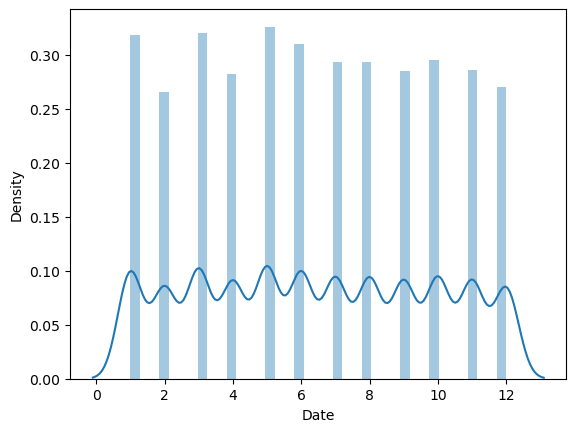

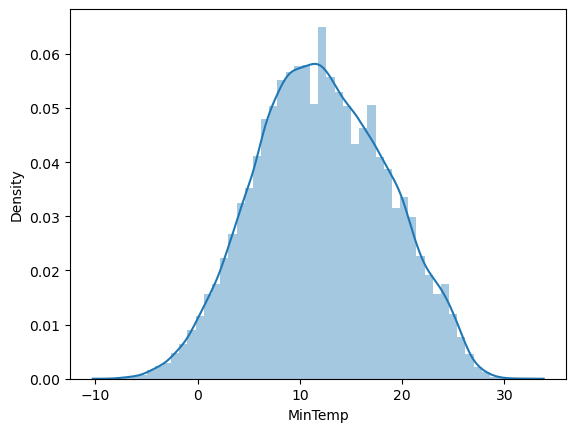

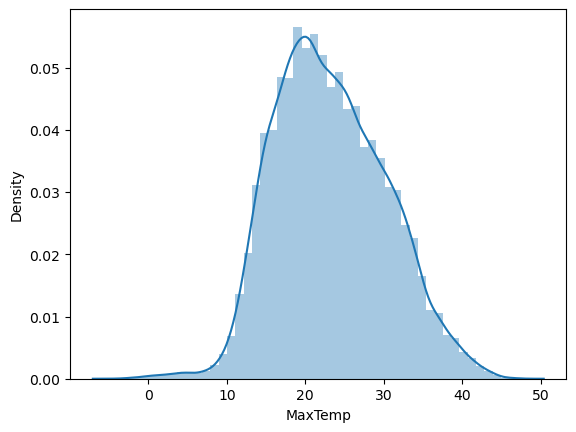

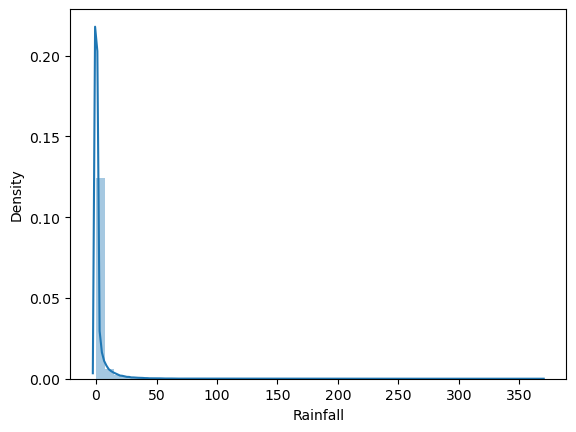

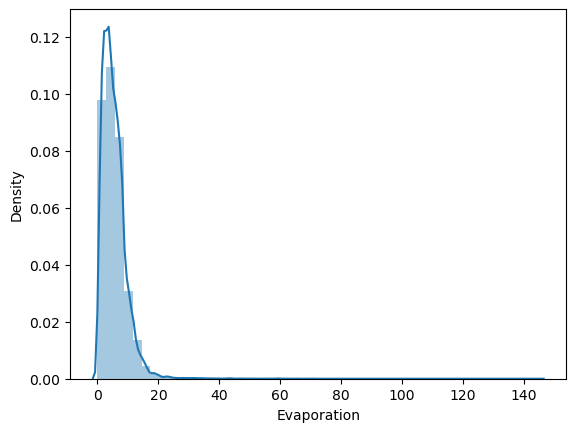

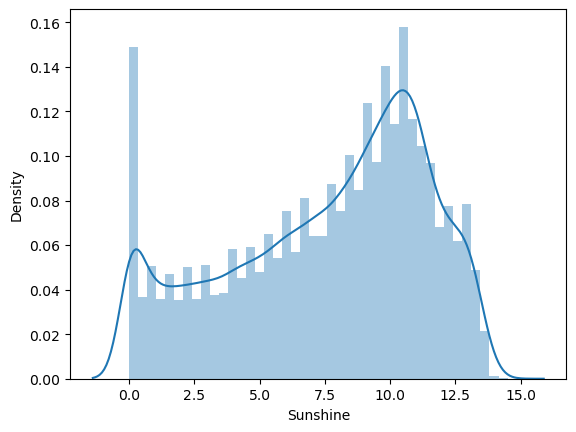

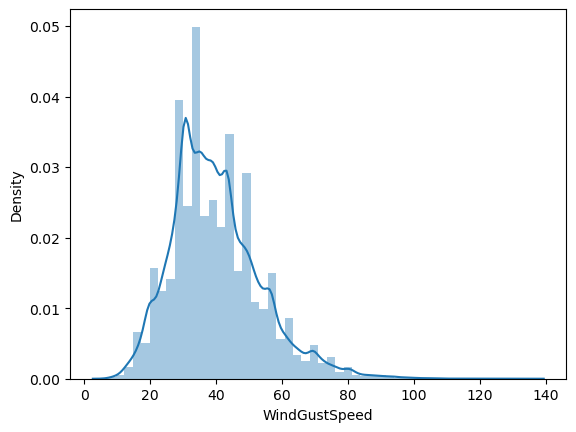

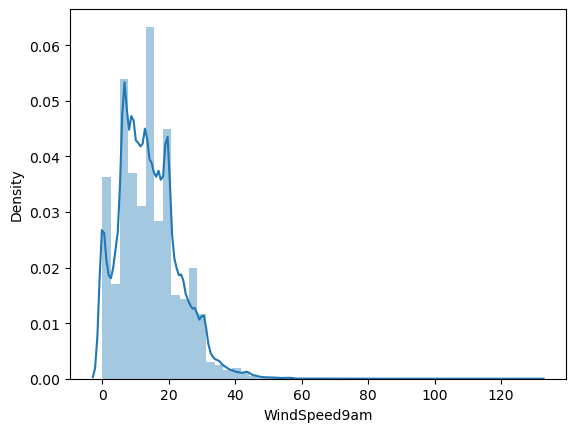

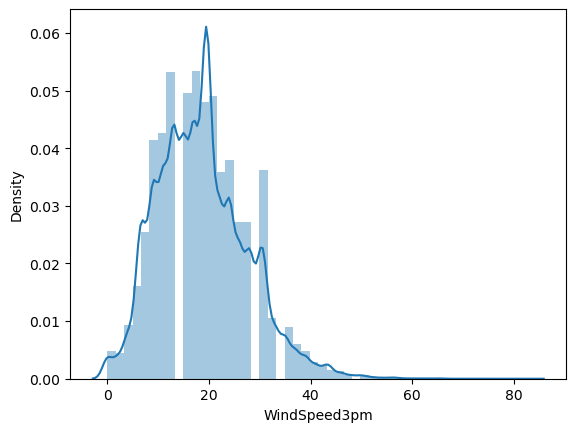

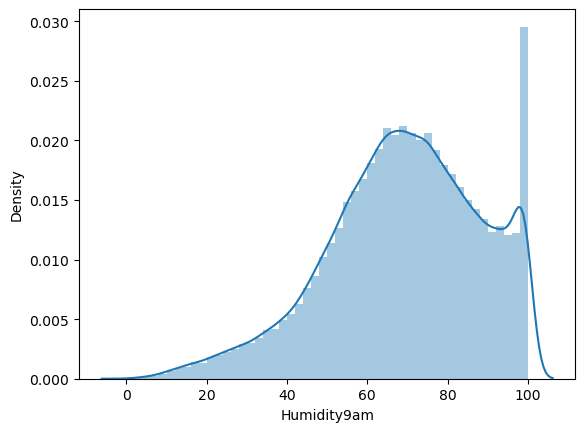

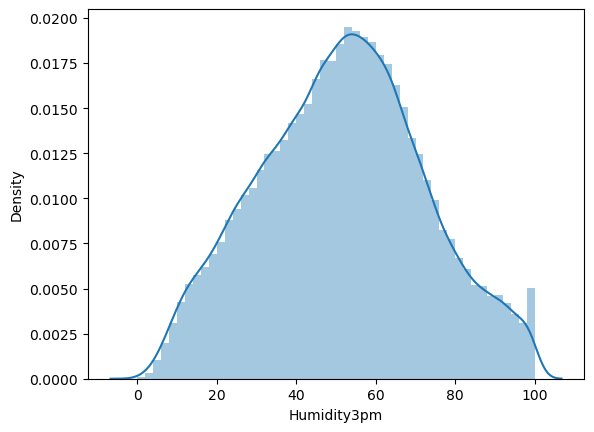

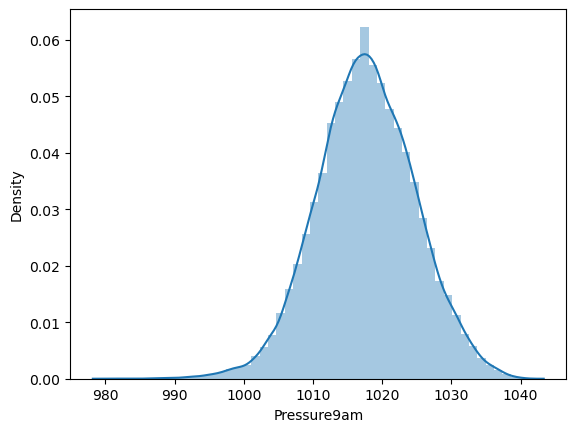

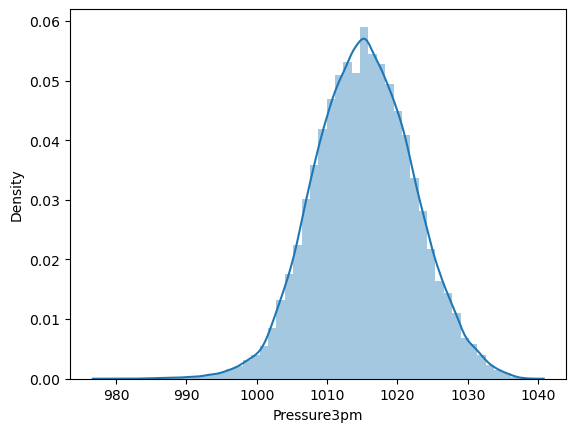

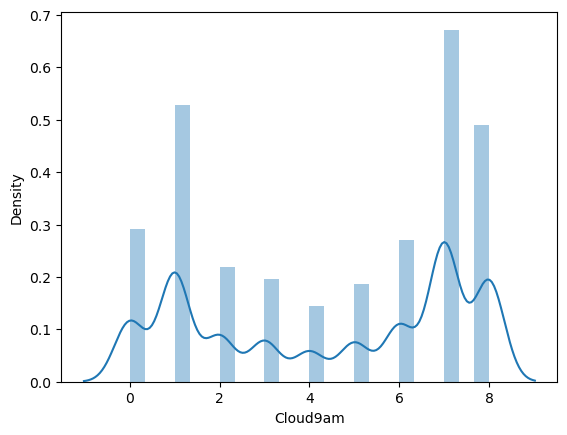

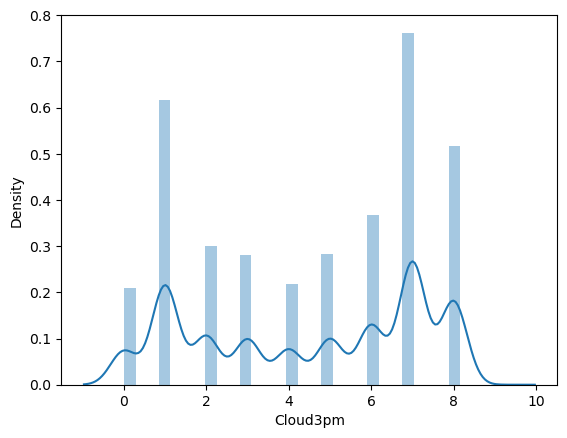

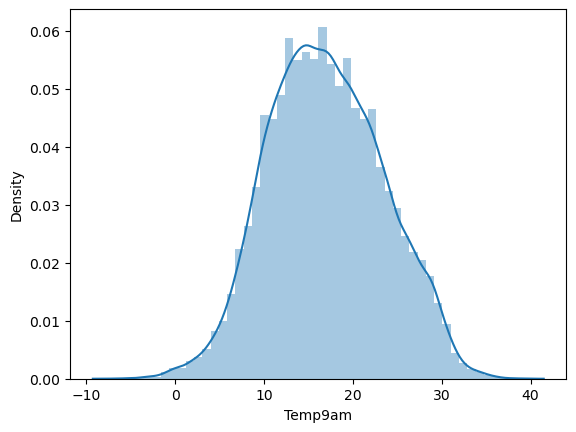

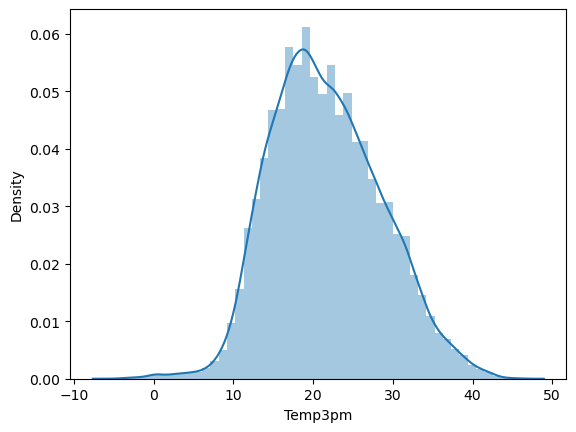

In [313]:
for col in num_columns: 
    sns.distplot(X_train[col]) 
    plt.show()

### deniz kenari

In [316]:
oceanSide = pd.read_excel("data/Oceansideornot.xlsx")

In [317]:
oceanSide.head()

,ŞEHİR,OceanSideOrNot
0,Canberra,0
1,Sydney,1
2,Hobart,1
3,Brisbane,0
4,Darwin,1


In [320]:
oceanSide_dict = pd.Series(oceanSide["OceanSideOrNot"].values, index=oceanSide["ŞEHİR"]).to_dict()

In [329]:
train_df["Location"].replace(oceanSide_dict, inplace=True)

## submission 3

In [336]:
test_df["Date"] = pd.to_datetime(train_df["Date"]).dt.month

In [338]:
test_df.columns

Index(['ID', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday'],
      dtype='object')

In [340]:
y_pred3 = pipe_XGBC.predict(test_df.drop("ID",axis=1))

In [341]:
series_Y_pred3 = pd.Series(y_pred3)
submission_Df3 = test_df["ID"].to_frame().join(series_Y_pred3.to_frame())
submission_Df3.rename({0: "RainTomorrow"},axis=1,inplace=True)
submission_Df3.set_index("ID",inplace=True)
submission_Df3.head()

,RainTomorrow
ID,
0,1
1,0
2,0
3,0
4,0


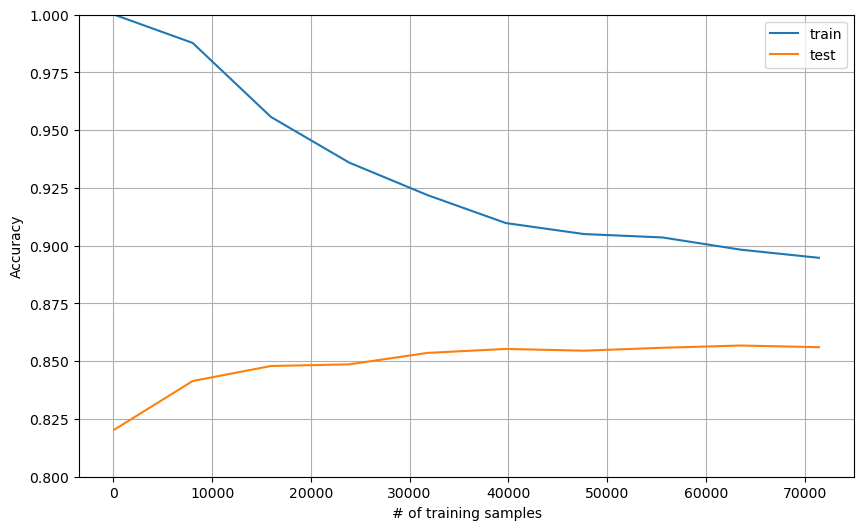

In [343]:
plotLearningCurve(pipe_XGBC,
                  X_train, y_train, X_test, y_test, 
                  n_iter=10, minY=0.80, maxY=1)

In [344]:
submission_Df3.to_csv("submission3.csv")

# grid search

In [345]:
# A parameter grid for XGBoost
params = {
        'XGBC__min_child_weight': [1, 1.25, 1.50],
        'XGBC__gamma': [0, 0.25, 0.5],
        'XGBC__subsample': [0.5, 0.75, 1],
        'XGBC__max_depth': [6, 8, 10],
        'XGBC__lambda': [0.75, 1, 1.25],
        'XGBC__eta': [0.05, 0.15, 0.3]
        }

In [348]:
random_cv = mod.RandomizedSearchCV(pipe_XGBC, param_distributions=params,n_iter=15,
                                    scoring="accuracy",random_state=42, verbose=3)

In [349]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END XGBC__eta=0.15, XGBC__gamma=0.5, XGBC__lambda=1.25, XGBC__max_depth=8, XGBC__min_child_weight=1, XGBC__subsample=0.5;, score=0.848 total time=   9.8s
[CV 2/5] END XGBC__eta=0.15, XGBC__gamma=0.5, XGBC__lambda=1.25, XGBC__max_depth=8, XGBC__min_child_weight=1, XGBC__subsample=0.5;, score=0.845 total time=  10.8s
[CV 3/5] END XGBC__eta=0.15, XGBC__gamma=0.5, XGBC__lambda=1.25, XGBC__max_depth=8, XGBC__min_child_weight=1, XGBC__subsample=0.5;, score=0.846 total time=  13.7s
[CV 4/5] END XGBC__eta=0.15, XGBC__gamma=0.5, XGBC__lambda=1.25, XGBC__max_depth=8, XGBC__min_child_weight=1, XGBC__subsample=0.5;, score=0.847 total time=   9.8s
[CV 5/5] END XGBC__eta=0.15, XGBC__gamma=0.5, XGBC__lambda=1.25, XGBC__max_depth=8, XGBC__min_child_weight=1, XGBC__subsample=0.5;, score=0.845 total time=   5.7s
[CV 1/5] END XGBC__eta=0.05, XGBC__gamma=0.25, XGBC__lambda=1.25, XGBC__max_depth=8, XGBC__min_child_weight=1.25, XGBC__subs

RandomizedSearchCV(estimator=Pipeline(steps=[('ct',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imp',
                                                                                                SimpleImputer())]),
                                                                               ['MinTemp',
                                                                                'MaxTemp',
                                                                                'Rainfall',
                                                                                'Evaporation',
                                                                                'Sunshine',
                                                                                'WindGustSpeed',
                                                                                'WindSpeed9am',
                                                                                'WindSpeed3pm',
                                                                                'Humidity9am',
                                                                                'Humidity3pm',
                                                                                'Pressure9am',
                                                                                'Pressure3pm',
                                                                                'Cloud9am',
                                                                                'Cloud3pm',
                                                                                'Temp9am',
                                                                                'Temp3pm']),
                                                                              ('cat',
                                                                               Pipeline...
                                                            monotone_constraints='()',
                                                            n_estimators=100,
                                                            n_jobs=0,
                                                            num_parallel_tree=1,
                                                            predictor='auto',
                                                            random_state=0, ...))]),
                   n_iter=15,
                   param_distributions={'XGBC__eta': [0.05, 0.15, 0.3],
                                        'XGBC__gamma': [0, 0.25, 0.5],
                                        'XGBC__lambda': [0.75, 1, 1.25],
                                        'XGBC__max_depth': [6, 8, 10],
                                        'XGBC__min_child_weight': [1, 1.25,
                                                                   1.5],
                                        'XGBC__subsample': [0.5, 0.75, 1]},
                   random_state=42, scoring='accuracy', verbose=3)

In [350]:
random_cv.best_params_

{'XGBC__subsample': 1,
 'XGBC__min_child_weight': 1,
 'XGBC__max_depth': 6,
 'XGBC__lambda': 1,
 'XGBC__gamma': 0,
 'XGBC__eta': 0.3}

In [352]:
pipe_XGBC["XGBC"].get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [353]:
random_cv.best_score_

0.852150433660749

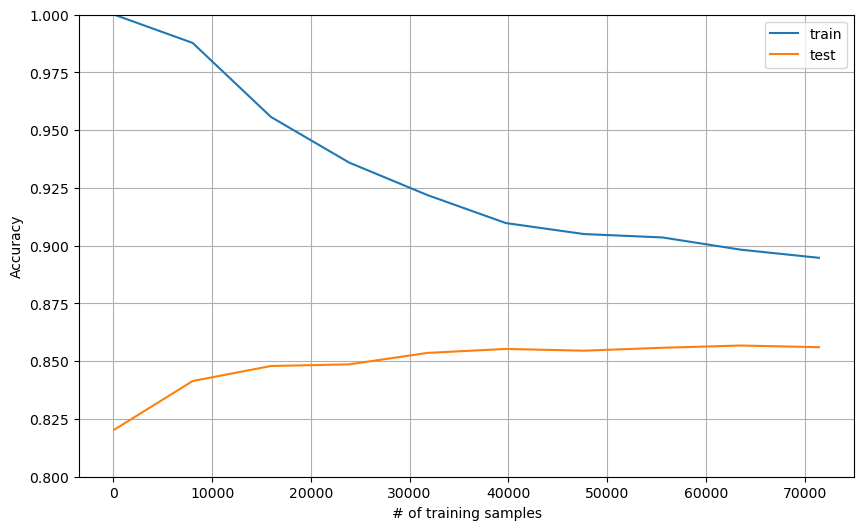

In [354]:
plotLearningCurve(random_cv.best_estimator_,
                  X_train, y_train, X_test, y_test, 
                  n_iter=10, minY=0.80, maxY=1)